In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('gpa_iq.csv')

In [3]:
df.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


In [4]:
df.describe()

,obs,gpa,iq,gender,concept
count,78.000000,78.000000,78.000000,78.000000,78.000000
mean,42.974359,7.446538,108.923077,1.602564,56.961538
std,25.889864,2.099557,13.170973,0.492535,12.412229
min,1.000000,0.530000,72.000000,1.000000,20.000000
25%,20.250000,6.278000,103.000000,1.000000,51.000000
50%,42.000000,7.829000,110.000000,2.000000,59.500000
75%,62.750000,8.983000,117.500000,2.000000,66.000000
max,89.000000,10.760000,136.000000,2.000000,80.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   obs      78 non-null     int64  
 1   gpa      78 non-null     float64
 2   iq       78 non-null     int64  
 3   gender   78 non-null     int64  
 4   concept  78 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.2 KB


In [6]:
df = df.drop('obs', axis = 1)

In [7]:
df.isna().sum()

gpa        0
iq         0
gender     0
concept    0
dtype: int64

In [8]:
df = df[df['iq'] >= 70]

In [9]:
df.head(20)

,gpa,iq,gender,concept
0,7.940,111,2,67
1,8.292,107,2,43
2,4.643,100,2,52
3,7.470,107,2,66
4,8.882,114,1,58
5,7.585,115,2,51
6,7.650,111,2,71
7,2.412,97,2,51
8,6.000,100,1,49
9,8.833,112,2,51


<AxesSubplot: >

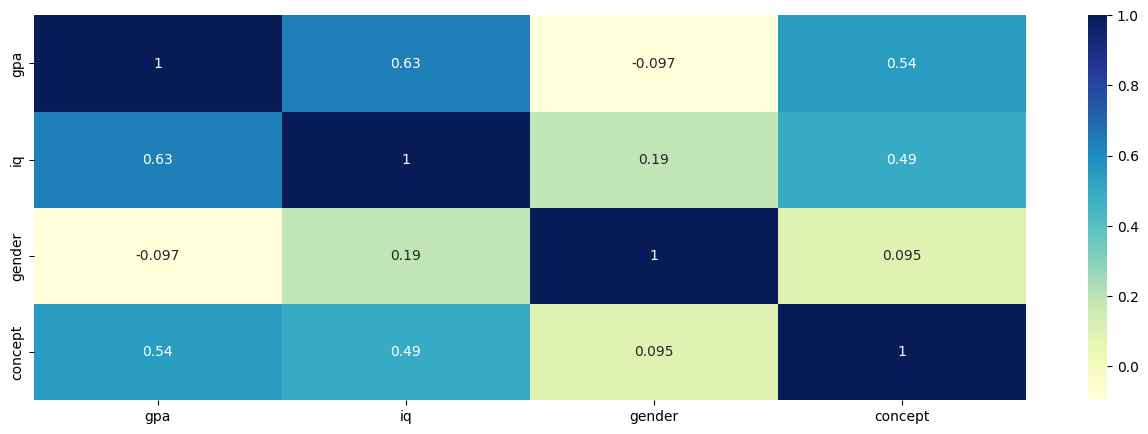

In [10]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [11]:
X = df.drop('gpa', axis = 1)
y = df['gpa']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
pr = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

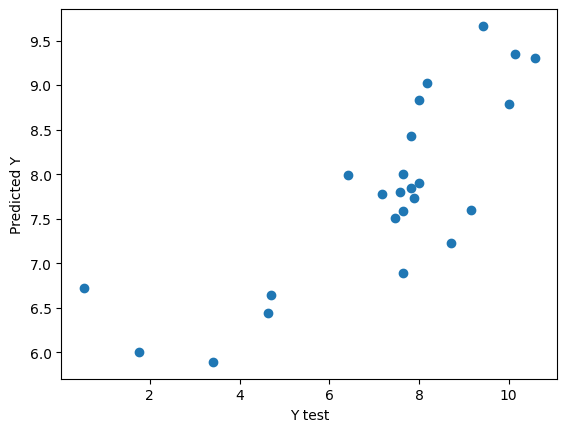

In [18]:
plt.scatter(y_test,pr)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

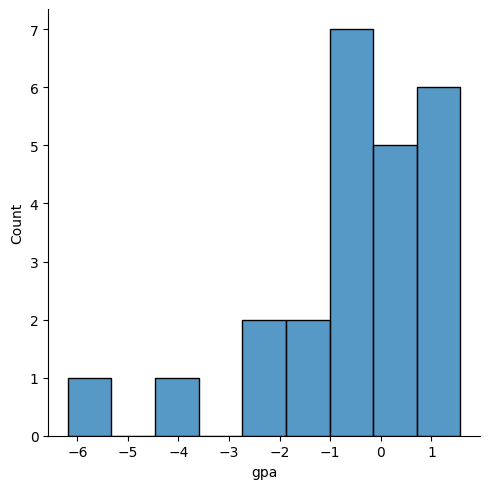

In [19]:
sns.displot(y_test - pr)

In [20]:
from sklearn import metrics

In [21]:
print("MAE:",metrics.mean_absolute_error(y_test,pr))
print("MSE:",metrics.mean_squared_error(y_test,pr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pr)))

MAE: 1.2241082171835196
MSE: 3.4730338320050556
RMSE: 1.8636077462827458
